In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams


%matplotlib inline

iris = datasets.load_iris()


In [52]:
df=pd.read_csv('Iris.csv')
del df['Id']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


X = pd.DataFrame(x)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']


Y = pd.DataFrame(y)
Y.columns = ['Targets']

X


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(x, clusters)

0.6808136202936816

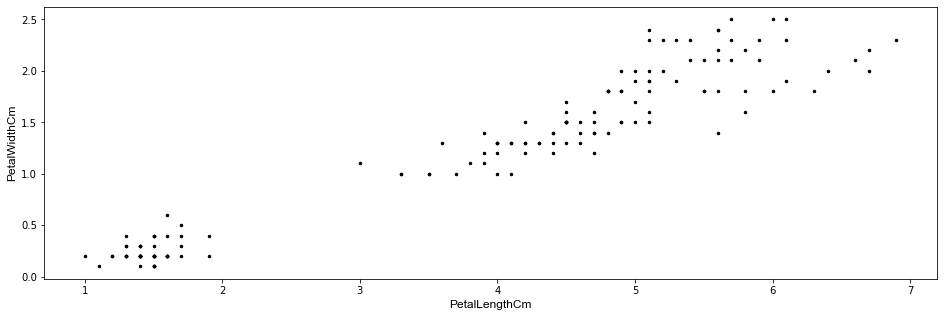

In [56]:
#plot interesting data
rcParams['figure.figsize'] = 16,5

_ = plt.plot(df['PetalLengthCm'],df['PetalWidthCm'],linestyle=None,linewidth=0,marker='.',markersize=5,color='black')

_ = plt.xlabel('PetalLengthCm', family='Arial', fontsize=12)

_ = plt.ylabel('PetalWidthCm', family='Arial', fontsize=12)

_ = plt.show()


In [57]:
#subset of data to be clustered
df_clustering=df[['PetalLengthCm','PetalWidthCm']]
df_clustering.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [58]:
Z=df_clustering.iloc[:,:].values



In [59]:
#create a list of hypothetical scenarios for diffferent number of custers


kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(Z) for k in range(1,10)]
silhouette_scores = [silhouette_score(Z,model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.7651755502866581,
 0.6602760882193361,
 0.612530696724084,
 0.5881403468025436,
 0.5760543202653141,
 0.5730470479747247,
 0.5847618631252907,
 0.5860915834442614]

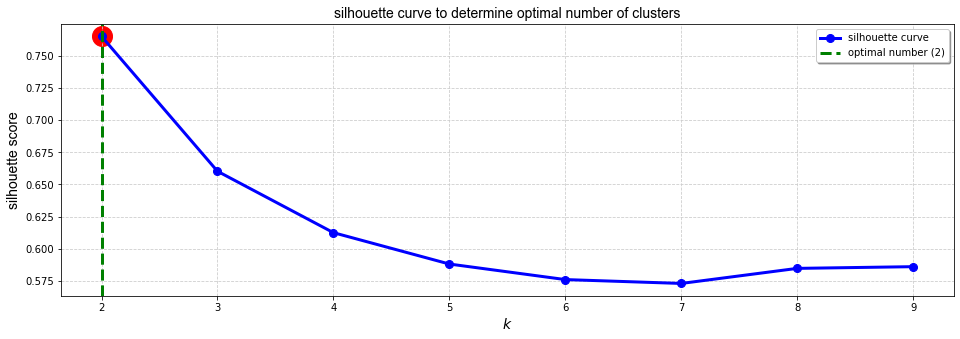

In [60]:
#plot silhouette score graph.


rcParams['figure.figsize'] = 16,5
_ = plt.plot(range(2,10),silhouette_scores, "bo-", color="blue",linewidth=3,markersize=8,label='silhouette curve' )
_ = plt.xlabel('$k$', family='Arial', fontsize=14)
_ = plt.ylabel('silhouette score', family='Arial', fontsize=14)
_ = plt.grid(which='major', color='#cccccc', linestyle='--')
_ = plt.title('silhouette curve to determine optimal number of clusters', family='Arial',fontsize=14)



#calculate optimal number of cluster

k=np.argmax(silhouette_scores)+2



#draw a line to point optimal number

_ = plt.axvline(x=k, linestyle='--',c='green',linewidth=3,label='optimal number ({})'.format(k))
_ = plt.scatter(k,silhouette_scores[k-2],c='red', s=400 )
_ = plt.legend(shadow=True)
_ = plt.show()




In [61]:
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [62]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Accuracy =  0.6666666666666666
Accuracy using GMM =  0.6666666666666666


Text(0, 0.5, 'Petal Width')

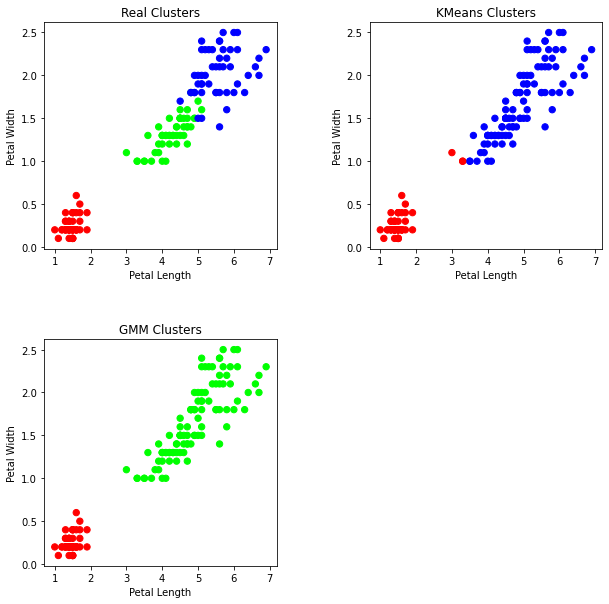

In [63]:
# Build the KMeans Model
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(2):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime','blue'])




# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[Y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')



# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')






# General EM for GMM
from sklearn import preprocessing



scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(2):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

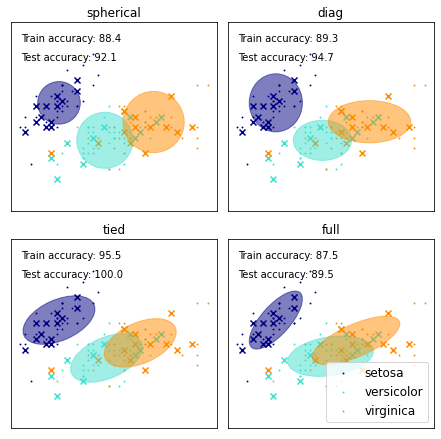

In [64]:
# matrices
from sklearn.model_selection import StratifiedKFold
colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

In [65]:
#pca



from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=42)
pca.fit(X)
X_pca_array = pca.transform(X)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample

<bound method NDFrame.sample of           PC1       PC2
0   -2.684207  0.326607
1   -2.715391 -0.169557
2   -2.889820 -0.137346
3   -2.746437 -0.311124
4   -2.728593  0.333925
..        ...       ...
145  1.944017  0.187415
146  1.525664 -0.375021
147  1.764046  0.078519
148  1.901629  0.115877
149  1.389666 -0.282887

[150 rows x 2 columns]>

In [66]:
y_id_array = pd.Categorical(df['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
98,-0.908463,-0.751569,1,1
26,-2.469056,0.137887,0,0
22,-3.215858,0.141616,0,0
60,-0.511086,-1.262492,1,1
109,2.918134,0.780381,2,2


In [67]:

n_components=2
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    

    fig, ax = plt.subplots(figsize = (7,7))


    cmap = mpl.cm.get_cmap('prism')

    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, 
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(n_components-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30) 
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

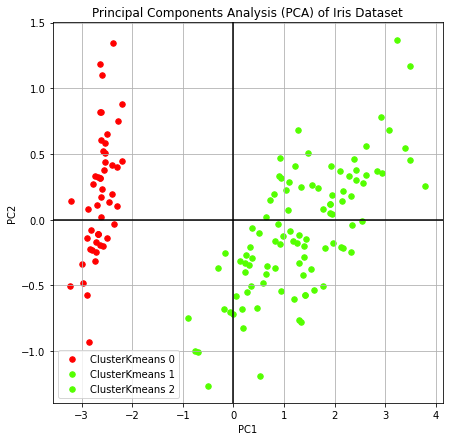

In [68]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'ClusterKmeans')

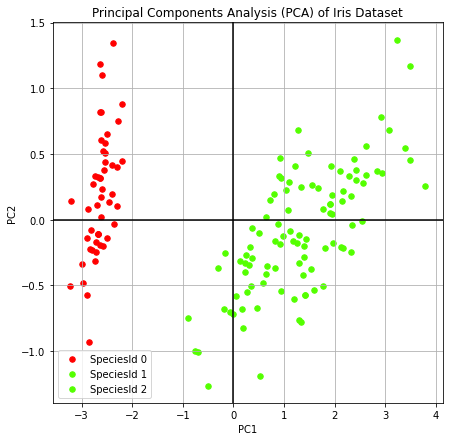

In [69]:
plotData(df_plot, 'SpeciesId')